<a href="https://colab.research.google.com/github/amitesh23s/amitesh23s.github.io/blob/main/Cat%20vs%20Non%20cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

def load_data():
    train_dataset = h5py.File('/content/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    print(train_set_y_orig.shape)
    #train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    #test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    print(train_set_y_orig.shape)
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()
print(train_x_orig.shape)
print(train_y[:10])
print(classes)

train_items_count = train_x_orig.shape[0]
test_items_count = test_x_orig.shape[0]
pixels_in_image = train_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(train_items_count))
print ("Number of testing examples: m_test = " + str(test_items_count))
print ("Height/Width of each image: num_px = " + str(pixels_in_image))
print ("Each image is of size: (" + str(pixels_in_image) + ", " + str(pixels_in_image) + ", 3)")
print ("train_set_x shape: " + str(train_x_orig.shape))
print ("train_set_y shape: " + str(train_y.shape))
print ("test_set_x shape: " + str(test_x_orig.shape))
print ("test_set_y shape: " + str(test_y.shape))

(209,)
(209,)
(209, 64, 64, 3)
[0 0 1 0 0 0 0 1 0 0]
[b'non-cat' b'cat']
Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (209,)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (50,)


In [ ]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1)
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1)

print("Flattened shape train: ", train_x_flatten.shape)
print("Flattened shape test: ", test_x_flatten.shape)

Flattened shape train:  (209, 12288)
Flattened shape test:  (50, 12288)


In [ ]:
train_set_x = train_x_flatten / 255.
test_set_x = test_x_flatten / 255.

input_shape = [train_set_x.shape[1]]

In [78]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import pandas as pd

# model = keras.Sequential([
#     layers.Dense(1, activation='relu', input_shape=input_shape),
#     #layers.Dense(1, activation='relu'),
#     layers.Dense(1, activation='sigmoid'),
# ])

model = keras.Sequential([
    layers.Dense(20, activation = "relu", input_shape=input_shape),
    layers.Dense(7, activation = "relu"),
    layers.Dense(5, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

optimizer = Adam(learning_rate=0.0075)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

Epoch 1/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - binary_accuracy: 0.3541 - loss: 0.7114 - val_binary_accuracy: 0.6000 - val_loss: 0.7924
Epoch 2/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - binary_accuracy: 0.4737 - loss: 1.0048 - val_binary_accuracy: 0.3400 - val_loss: 1.2209
Epoch 3/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - binary_accuracy: 0.6555 - loss: 0.7177 - val_binary_accuracy: 0.3400 - val_loss: 1.1362
Epoch 4/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - binary_accuracy: 0.6555 - loss: 0.7006 - val_binary_accuracy: 0.6600 - val_loss: 0.6317
Epoch 5/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - binary_accuracy: 0.3493 - loss: 0.7757 - val_binary_accuracy: 0.3400 - val_loss: 1.3065
Epoch 6/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - binary_accuracy: 0.6555 - loss: 0.7487 - val_binary_accuracy: 0.3400 - val_loss: 1.1060
Epoch 7/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - binary_accuracy: 0.6555 - loss: 0.6908 - val_binary_accuracy: 0.6600 - val_loss: 0.6133
Epoch 8/2

<Axes: title={'center': 'Accuracy'}>

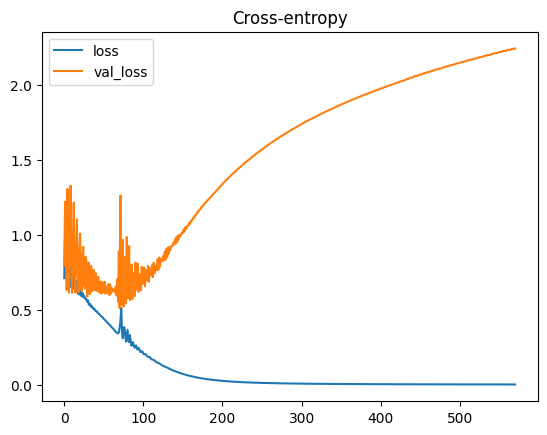

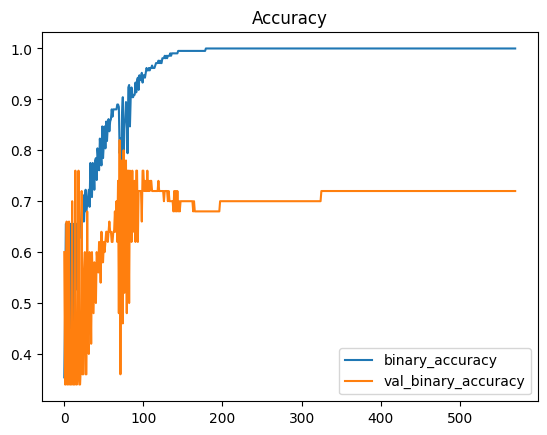

In [79]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=500,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    train_set_x, train_y,
    validation_data=(test_set_x, test_y),
    batch_size=209,
    epochs=2500,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [80]:
val_loss, val_accuracy = model.evaluate(test_set_x, test_y)

print(f"Final Validation Accuracy: {val_accuracy:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.8175 - loss: 0.5024
Final Validation Accuracy: 0.8200
Final Validation Loss: 0.5104
